In [35]:
import importlib

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn.metrics import mean_squared_error, roc_auc_score, make_scorer, roc_curve, auc

In [37]:
from lambda_func import *
from regression_models import *
from utils import *
import My_Model_Class
import My_Table_Plotter_Class

Some variables

In [38]:
data_df_path = '../result/data.xlsx'
score_df_path = '../data/SME_dataset.csv'
connect_flag_df_path = '../result/connect_flag_df_threshold_%s.csv'

lambda_select_fun_list = [lambda_min_func, lambda_1se_func]
# We used one lambda func here
lambda_func = lambda_min_func

# you can add other models in ./code/regression_models.py
model_func_list = [get_ElasticNet]
model_name_list = ["ElasticNet"]

threshold_list = [0.05, 0.1]

If you have set up all the variables, just run the code in the following

In [39]:
# data after processing
X = pd.read_excel(data_df_path, index_col = 0).values

# initial data
# X = pd.read_csv(score_df_path, index_col = 0).drop(['X1', 'status'], axis=1).values

y = pd.read_csv(score_df_path, index_col = 0)['status'].values

In [40]:
model_dict = dict(zip(model_name_list, model_func_list))

In [41]:
# you can ignore this part
connect_name_list = ["CSM", "NS-CSM(C)", "NS-CSM(NC)"]
threshold_dict = dict()
for threshold in threshold_list:
    cur_connect_flag_df_path = connect_flag_df_path % (str(threshold))
    connect_flag_df = pd.read_csv(cur_connect_flag_df_path, index_col=0)
    
    all_index = connect_flag_df.index
    connect_index = connect_flag_df[connect_flag_df.connect_flag==1].index
    non_connect_index = connect_flag_df[connect_flag_df.connect_flag==0].index

    my_index_list = [all_index, connect_index, non_connect_index]

    index_dict = dict(zip(connect_name_list, my_index_list))
    
    threshold_dict[threshold] = index_dict

Fit Model

In [42]:
importlib.reload(My_Model_Class)

result_model_dict = dict()

for model_name, model_func in model_dict.items():
    
    for threshold, index_dict in threshold_dict.items():

        for index_name, my_index in index_dict.items():
            print(model_name, threshold, index_name)
            
            my_model = My_Model_Class.My_Model(X[my_index], y[my_index], model_func, lambda_func)
            result_model_dict[(model_name, index_name, threshold)] = my_model

ElasticNet 0.05 CSM
ElasticNet 0.05 NS-CSM(C)
ElasticNet 0.05 NS-CSM(NC)
ElasticNet 0.1 CSM
ElasticNet 0.1 NS-CSM(C)
ElasticNet 0.1 NS-CSM(NC)


Plot Table

In [53]:
importlib.reload(My_Table_Plotter_Class)

my_table_plotter = My_Table_Plotter_Class.My_Table_Plotter(result_model_dict)

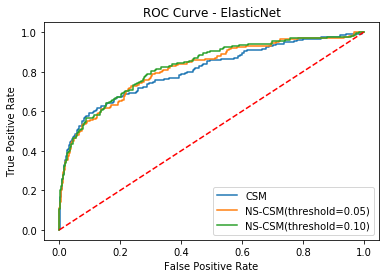

In [54]:
# there is bug in non-connect data
coef_df = my_table_plotter.get_coef_df()
num_of_selected_var_df = my_table_plotter.get_num_of_selected_var_df(threshold=0.1)
my_table_plotter.get_roc_cruve()
roc_df = my_table_plotter.get_roc_df()

# to be finished
# auc_df = my_table_plotter.get_auc_df()

In [55]:
my_table_plotter.get_roc_df()

,ElasticNet
CSM,0.804257
NS-CSM(γ = 0.05),0.816346
NS-CSM(γ = 0.1),0.826100


In [73]:
my_table_plotter.get_num_of_selected_var_df(threshold=0.1, coef_threshold=0.005)

,ElasticNet
CSM,14.0
NS-CSM(C),13.0
NS-CSM(NC),13.0


In [57]:
my_table_plotter.get_coef_df()


V1        V2        V3        V4        V5  \
ElasticNet CSM        0.05 -0.000168  0.000618 -0.013628 -0.015685  0.007526   
           NS-CSM(C)  0.05 -0.000414  0.001290 -0.014159 -0.014567  0.007930   
           NS-CSM(NC) 0.05  0.001501 -0.004651 -0.028456 -0.046879  0.016443   
           CSM        0.10 -0.000162 -0.000007 -0.012835 -0.013595  0.007473   
           NS-CSM(C)  0.10 -0.000336  0.000029 -0.015914 -0.012988  0.005745   
           NS-CSM(NC) 0.10  0.000910 -0.003456 -0.039259 -0.034837  0.007671   

                                  V6        V7        V8        V9       V10  \
ElasticNet CSM        0.05 -0.000027  0.000597 -0.418411 -0.019960 -0.034769   
           NS-CSM(C)  0.05 -0.000154  0.000539 -0.475100 -0.011257 -0.034984   
           NS-CSM(NC) 0.05  0.000319 -0.000259  0.585504 -0.106622  0.016016   
           CSM        0.10 -0.000015  0.000570 -0.435337 -0.019413 -0.040094   
           NS-CSM(C)  0.10 -0.000190  0.000576 -0.481690 -0.006559 -0.035221   
           NS-CSM(NC) 0.10  0.000481 -0.000196  0.482245 -0.103092  0.014081   

                            ...       V15       V16       V17       V18  \
ElasticNet CSM        0.05  ...  0.000289  0.051763  0.044705  0.023911   
           NS-CSM(C)  0.05  ... -0.019423  0.068006  0.045791  0.046785   
           NS-CSM(NC) 0.05  ...  0.011946 -0.008951  0.048151  0.007536   
           CSM        0.10  ... -0.005794  0.049783  0.053739  0.022316   
           NS-CSM(C)  0.10  ... -0.037849  0.092027  0.023234  0.051849   
           NS-CSM(NC) 0.10  ...  0.028400  0.010069  0.048216 -0.003159   

                                 V19       V20       V21       V22       V23  \
ElasticNet CSM        0.05  0.036581  0.000011  0.000337  0.000041 -0.000001   
           NS-CSM(C)  0.05  0.004405 -0.000003  0.000302  0.000018 -0.000002   
           NS-CSM(NC) 0.05  0.044093  0.000166  0.000254  0.000113 -0.000002   
           CSM        0.10  0.029447  0.000007  0.000338  0.000041 -0.000001   
           NS-CSM(C)  0.10  0.017532 -0.000011  0.000319  0.000005 -0.000002   
           NS-CSM(NC) 0.10  0.037557  0.000088  0.000240  0.000100 -0.000002   

                                 V24  
ElasticNet CSM        0.05  0.000002  
           NS-CSM(C)  0.05 -0.000005  
           NS-CSM(NC) 0.05  0.000003  
           CSM        0.10  0.000002  
           NS-CSM(C)  0.10 -0.000004  
           NS-CSM(NC) 0.10  0.000002  

[6 rows x 24 columns]